# Bayes Decision Rule
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the calculation of **likelihood** of each features given particular class 
- implement the calculation of **posterior** of each class given particular feature
- implement the calculation of **minimal total risk** of bayes decision rule

In [17]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
data = sio.loadmat('data.mat')
x1_train, x1_test, x2_train, x2_test = data['x1_train'], data['x1_test'], data['x2_train'], data['x2_test']
all_x = np.concatenate([x1_train, x1_test, x2_train, x2_test], 1)
data_range = [np.min(all_x), np.max(all_x)]

In [19]:
from get_x_distribution import get_x_distribution

train_x = get_x_distribution(x1_train, x2_train, data_range)
test_x = get_x_distribution(x1_test, x2_test, data_range)

## Part 1 likelihood
Your code for this section will be written inside **bayes_decision_rule/likehood.py**. 

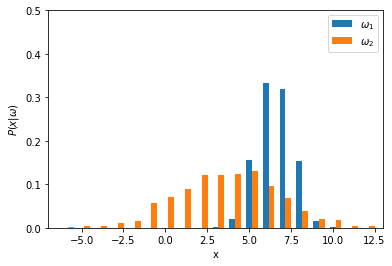

In [20]:
from likelihood import likelihood

l = likelihood(train_x)
width = 0.35
p1 = plt.bar(np.arange(data_range[0], data_range[1] + 1), l.T[:,0], width)
p2 = plt.bar(np.arange(data_range[0], data_range[1] + 1) + width, l.T[:,1], width)
plt.xlabel('x')
plt.ylabel('$P(x|\omega)$')
plt.legend((p1[0], p2[0]), ('$\omega_1$', '$\omega_2$'))
plt.axis([data_range[0] - 1, data_range[1] + 1, 0, 0.5])
plt.show()

In [21]:
# TODO
# compute the number of all the misclassified x using maximum likelihood decision rule

# begin answer
error_l = 0
for x in range(test_x.shape[1]):
    if l[0][x] > l[1][x]:  # p(x|ω1) > p(x|ω2)
        error_l += test_x[1][x]
    elif l[0][x] < l[1][x]:  # p(x|ω1) < p(x|ω2)
        error_l += test_x[0][x]
print(f'Error of Maximum Likelihood Decision Rule is {error_l}')
# end answer


Error of Maximum Likelihood Decision Rule is 64.0


## Part 2 posterior
Your code for this section will be written inside **bayes_decision_rule/posterior.py**. 

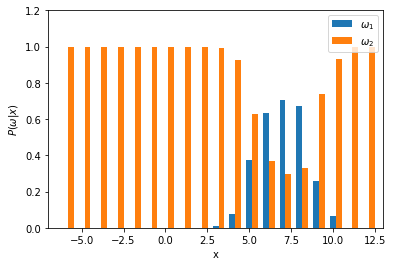

In [22]:
from posterior import posterior

p = posterior(train_x)
width = 0.35
p1 = plt.bar(np.arange(data_range[0], data_range[1] + 1), p.T[:,0], width)
p2 = plt.bar(np.arange(data_range[0], data_range[1] + 1) + width, p.T[:,1], width)
plt.xlabel('x')
plt.ylabel('$P(\omega|x)$')
plt.legend((p1[0], p2[0]), ('$\omega_1$', '$\omega_2$'))
plt.axis([data_range[0] - 1, data_range[1] + 1, 0, 1.2])
plt.show()

In [23]:
# TODO
# compute the number of all the misclassified x using optimal bayes decision rule

# begin answer
error_p = 0
for x in range(test_x.shape[1]):
    if p[0][x] > p[1][x]:  # p(ω1|x) > p(ω2|x)
        error_p += test_x[1][x]
    elif p[0][x] < p[1][x]:  # p(ω1|x) < p(ω2|x)
        error_p += test_x[0][x]
print(f'Error of Optimal Bayes Decision Rule is: {int(error_p)}')
# end answer


Error of Optimal Bayes Decision Rule is: 47


## Part 3 risk


In [24]:
risk = np.array([[0, 1], [2, 0]])
# TODO
# get the minimal risk using optimal bayes decision rule and risk weights

# begin answer
l = likelihood(test_x)
# calculate the p_ω1 and p_ω2
total = np.sum(test_x)
p_w1 = np.sum(test_x[0]) / total 
p_w2 = np.sum(test_x[1]) / total
# calculate the p(x) for every x 
p_x = [p_w1 * l[0][i] + p_w2 * l[1][i] for i in range(test_x.shape[1])]
# calculate the total Risk according to the formula
R = 0
for i in range(test_x.shape[1]):
    R += np.dot([p[0][i], p[1][i]], risk[0] if p[0][i] > p[1][i] else risk[1]) * p_x[i]
print('The minimum risk is {:.4f}'.format(R))
# end answer

The minimum risk is 0.2529
